<a href="https://colab.research.google.com/github/nishifwd/machine-learning/blob/main/FYP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("/content/Dataset.csv")

In [3]:
data.head() #First five rows

,WaterbodyName,Years,SampleDate,Alkalinity-total (as CaCO3),Ammonia-Total (as N),BOD - 5 days (Total),Chloride,Conductivity @25°C,Dissolved Oxygen,ortho-Phosphate (as P) - unspecified,pH,Temperature,Total Hardness (as CaCO3),True Colour,WQI Value,Label
0,LEE (CORK)_020,2008,Jan,8.0,0.069,1.3,13.2,69.0,54.10,0.005,6.89,8.9,10.8,33.0,74.281978,Fair
1,LEE (CORK)_021,2008,Jan,9.0,0.068,1.3,14.8,77.0,54.00,0.005,6.89,9.7,11.7,28.0,74.755756,Fair
2,LEE (CORK)_022,2008,Mar,15.0,0.033,1.4,16.0,106.0,53.90,0.021,7.18,6.6,17.0,22.0,72.037731,Fair
3,LEE (CORK)_023,2008,Mar,13.0,0.040,1.2,15.7,159.0,53.35,0.005,6.88,6.4,15.0,22.0,75.465689,Fair
4,LEE (CORK)_024,2008,Mar,12.0,0.039,1.1,16.0,144.0,53.40,0.021,7.23,6.3,16.3,24.0,71.975552,Fair


In [4]:
data.tail() #Last five rows

,WaterbodyName,Years,SampleDate,Alkalinity-total (as CaCO3),Ammonia-Total (as N),BOD - 5 days (Total),Chloride,Conductivity @25°C,Dissolved Oxygen,ortho-Phosphate (as P) - unspecified,pH,Temperature,Total Hardness (as CaCO3),True Colour,WQI Value,Label
7785,LEE (CORK)_7805,2022,Jun,44.0,1.500,2.5,19.2,172.0,56.55,0.056,7.4,15.7,44.0,23.0,63.915606,Marginal
7786,LEE (CORK)_7806,2022,Sep,31.0,0.140,2.8,21.2,160.0,53.95,0.015,7.1,14.9,45.0,27.0,74.858858,Fair
7787,LEE (CORK)_7807,2022,Nov,22.0,0.190,1.5,16.2,118.0,54.30,0.021,6.9,12.3,34.0,58.0,69.188960,Fair
7788,LEE (CORK)_7808,2023,Mar,36.0,0.210,1.6,17.4,151.0,52.40,0.059,7.2,7.1,44.0,20.0,70.234195,Fair
7789,LEE (CORK)_7809,2023,Feb,82.0,0.027,1.3,24.7,324.0,50.20,0.045,7.8,8.1,121.0,5.0,75.101627,Fair


In [5]:
data.info() #How many data and data type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7790 entries, 0 to 7789
Data columns (total 16 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   WaterbodyName                         7790 non-null   object 
 1   Years                                 7790 non-null   int64  
 2   SampleDate                            7790 non-null   object 
 3   Alkalinity-total (as CaCO3)           7790 non-null   float64
 4   Ammonia-Total (as N)                  7790 non-null   float64
 5   BOD - 5 days (Total)                  7790 non-null   float64
 6   Chloride                              7790 non-null   float64
 7   Conductivity @25°C                    7790 non-null   float64
 8   Dissolved Oxygen                      7790 non-null   float64
 9   ortho-Phosphate (as P) - unspecified  7790 non-null   float64
 10  pH                                    7790 non-null   float64
 11  Temperature      

In [6]:
# Check and remove duplicates if necessary
duplicate_rows = data.duplicated().sum()
if duplicate_rows > 0:
    print(f"Found {duplicate_rows} duplicate rows.")
    data = data.drop_duplicates()  # Remove duplicate rows
else:
    print("No duplicate rows found.")

No duplicate rows found.


In [7]:
data.isnull().sum() #Missing Value

,0
WaterbodyName,0
Years,0
SampleDate,0
Alkalinity-total (as CaCO3),0
Ammonia-Total (as N),0
BOD - 5 days (Total),0
Chloride,0
Conductivity @25°C,0
Dissolved Oxygen,0
ortho-Phosphate (as P) - unspecified,0


In [8]:
data.describe().T  #Statitistic Summary

,count,mean,std,min,25%,50%,75%,max
Years,7790.0,2014.450834,4.875872,2007.000000,2010.000000,2015.000000,2019.000000,2023.00
Alkalinity-total (as CaCO3),7790.0,133.957712,85.426700,5.000000,56.000000,126.000000,200.000000,432.00
Ammonia-Total (as N),7790.0,0.100439,0.724418,0.000000,0.027000,0.036000,0.050000,40.00
BOD - 5 days (Total),7790.0,1.513646,0.847076,0.000000,1.200000,1.300000,1.500000,16.00
Chloride,7790.0,20.179117,21.489667,0.000000,15.300000,19.000000,22.700000,1260.00
Conductivity @25°C,7790.0,351.326893,177.361167,33.000000,210.250000,343.000000,482.000000,4200.00
Dissolved Oxygen,7790.0,62.698621,24.630241,0.000000,50.850000,55.200000,88.000000,146.00
ortho-Phosphate (as P) - unspecified,7790.0,0.035831,0.103463,-0.004000,0.014000,0.021000,0.033000,5.30
pH,7790.0,7.618501,0.497189,5.400000,7.400000,7.700000,8.000000,8.67
Temperature,7790.0,10.718747,3.847484,1.700000,7.800000,10.500000,13.600000,58.00


In [9]:
cat_cols=data.select_dtypes(include=['object']).columns
num_cols = data.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables:") #Separation
print(cat_cols)
print("Numerical Variables:")
print(num_cols)

Categorical Variables:
Index(['WaterbodyName', 'SampleDate', 'Label'], dtype='object')
Numerical Variables:
['Years', 'Alkalinity-total (as CaCO3)', 'Ammonia-Total (as N)', 'BOD - 5 days (Total)', 'Chloride', 'Conductivity @25°C', 'Dissolved Oxygen', 'ortho-Phosphate (as P) - unspecified', 'pH', 'Temperature', 'Total Hardness (as CaCO3)', 'True Colour', 'WQI Value']


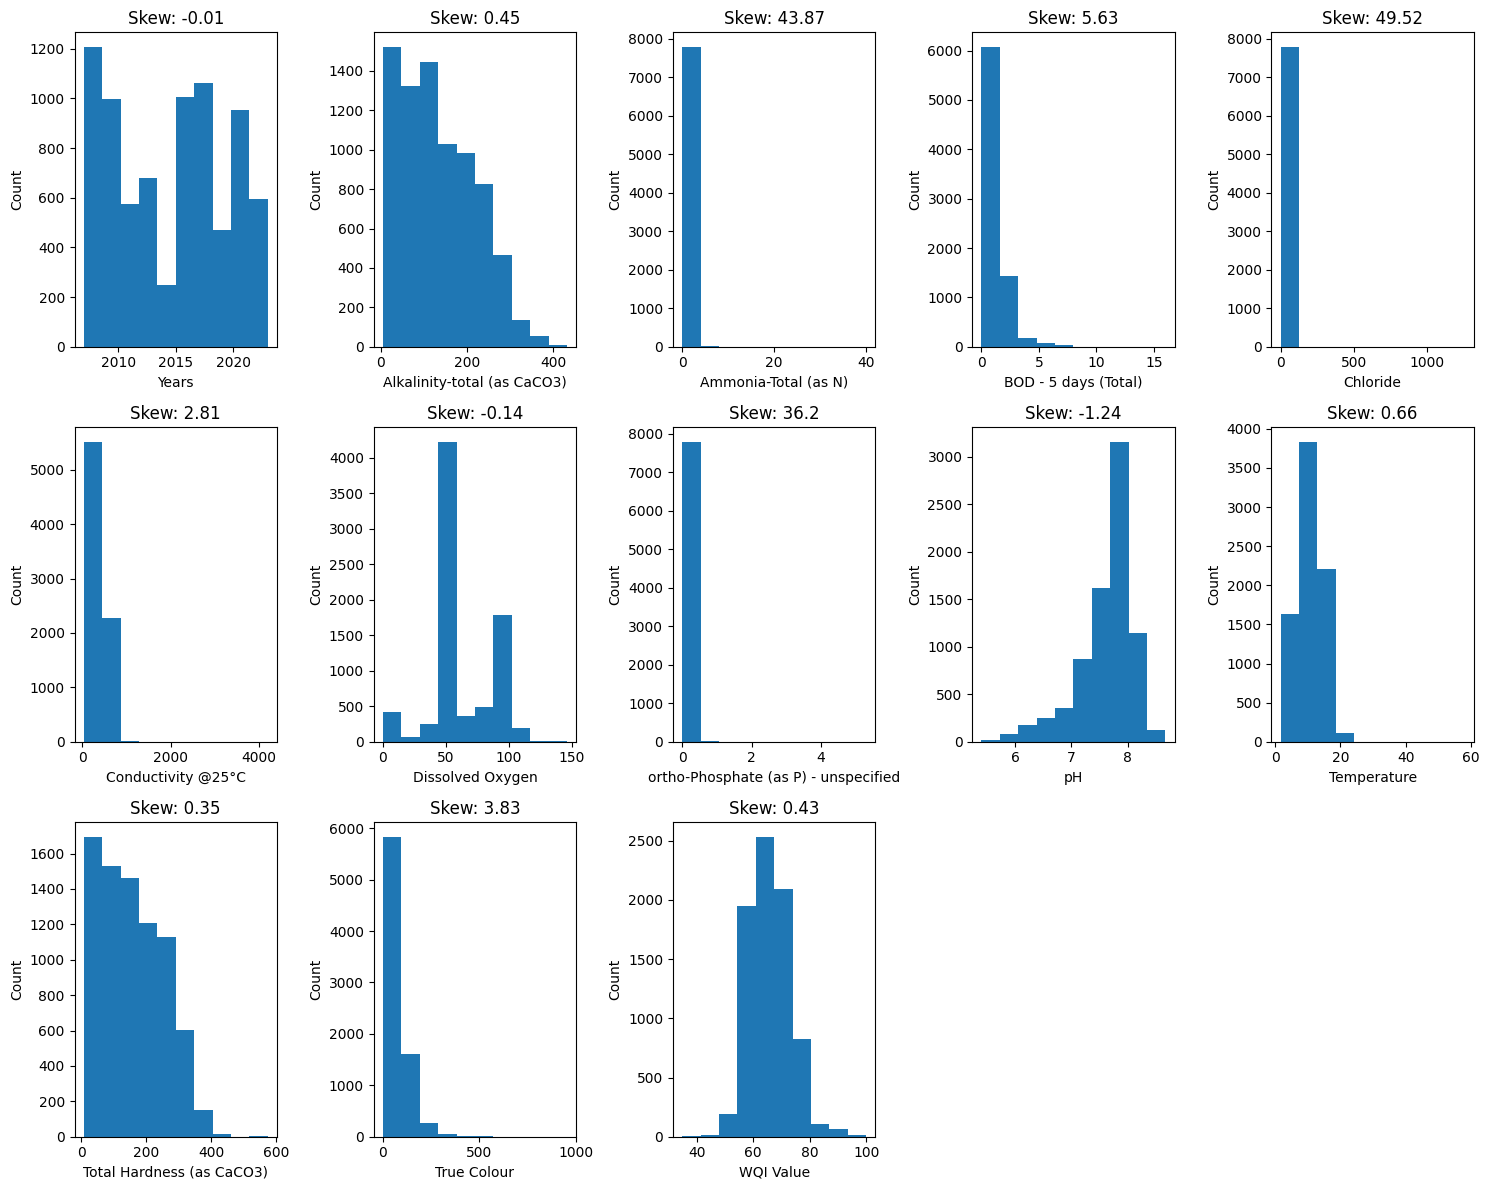

In [10]:
num_cols = data.select_dtypes(include=['number']).columns  # Ensure only numerical columns
num_per_row = 5  # Number of columns per row

# Calculate the number of rows needed
num_rows = -(-len(num_cols) // num_per_row)  # Equivalent to math.ceil(len(num_cols) / num_per_row)

plt.figure(figsize=(15, 4 * num_rows))  # Set the figure size dynamically

for i, col in enumerate(num_cols):
    plt.subplot(num_rows, num_per_row, i + 1)  # Create subplots
    data[col].hist(grid=False)
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.title(f'Skew: {round(data[col].skew(), 2)}')

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

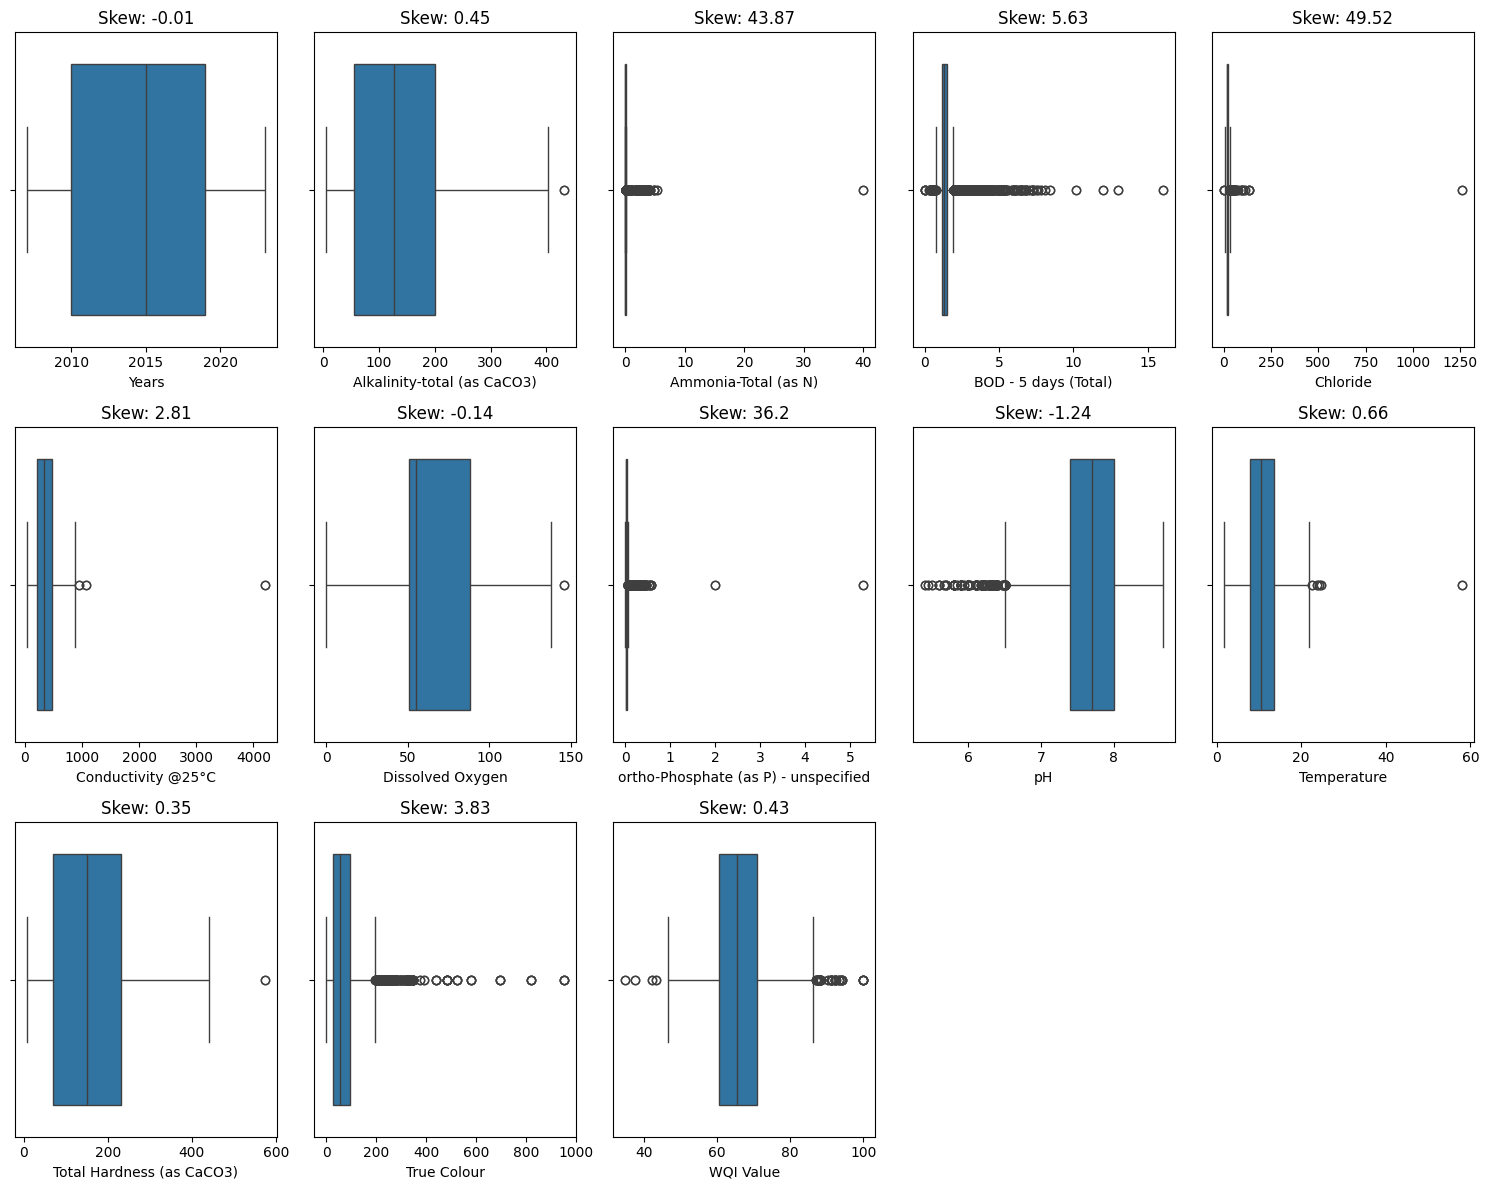

In [11]:
num_cols = data.select_dtypes(include=['number']).columns  # Ensure only numerical columns
num_per_row = 5  # Number of columns per row
num_rows = -(-len(num_cols) // num_per_row)  # Calculate the number of rows needed (equivalent to math.ceil)

fig, axes = plt.subplots(num_rows, num_per_row, figsize=(15, 4 * num_rows))  # Single figure with subplots
axes = axes.flatten()  # Flatten the 2D array to simplify indexing

for i, col in enumerate(num_cols):
    sns.boxplot(x=data[col], ax=axes[i])  # Assign each plot to a specific subplot
    axes[i].set_xlabel(col)
    axes[i].set_title(f'Skew: {round(data[col].skew(), 2)}')

# Remove empty subplots if the number of columns is not a perfect multiple of num_per_row
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

In [12]:
data = data.drop(columns=['WaterbodyName', 'Years', 'SampleDate', 'Label'], errors='ignore')
df = data.copy()
# Loop through each numerical column in the DataFrame 'data'
for col in data.select_dtypes(include=np.number):
    # Calculate the 25th and 75th percentiles (Q1 and Q3)
    percentile25 = df[col].quantile(0.25)
    percentile75 = df[col].quantile(0.75)

    # Calculate the IQR
    iqr = percentile75 - percentile25

    # Set the lower and upper bounds for outliers
    lower_limit = percentile25 - 1.5 * iqr
    upper_limit = percentile75 + 1.5 * iqr

    # Remove outliers by filtering the DataFrame 'data'
    df = df[(df[col] >= lower_limit) & (df[col] <= upper_limit)]

# Now, 'data' contains the data with outliers removed from all numerical columns
print(df.shape)

(4778, 12)


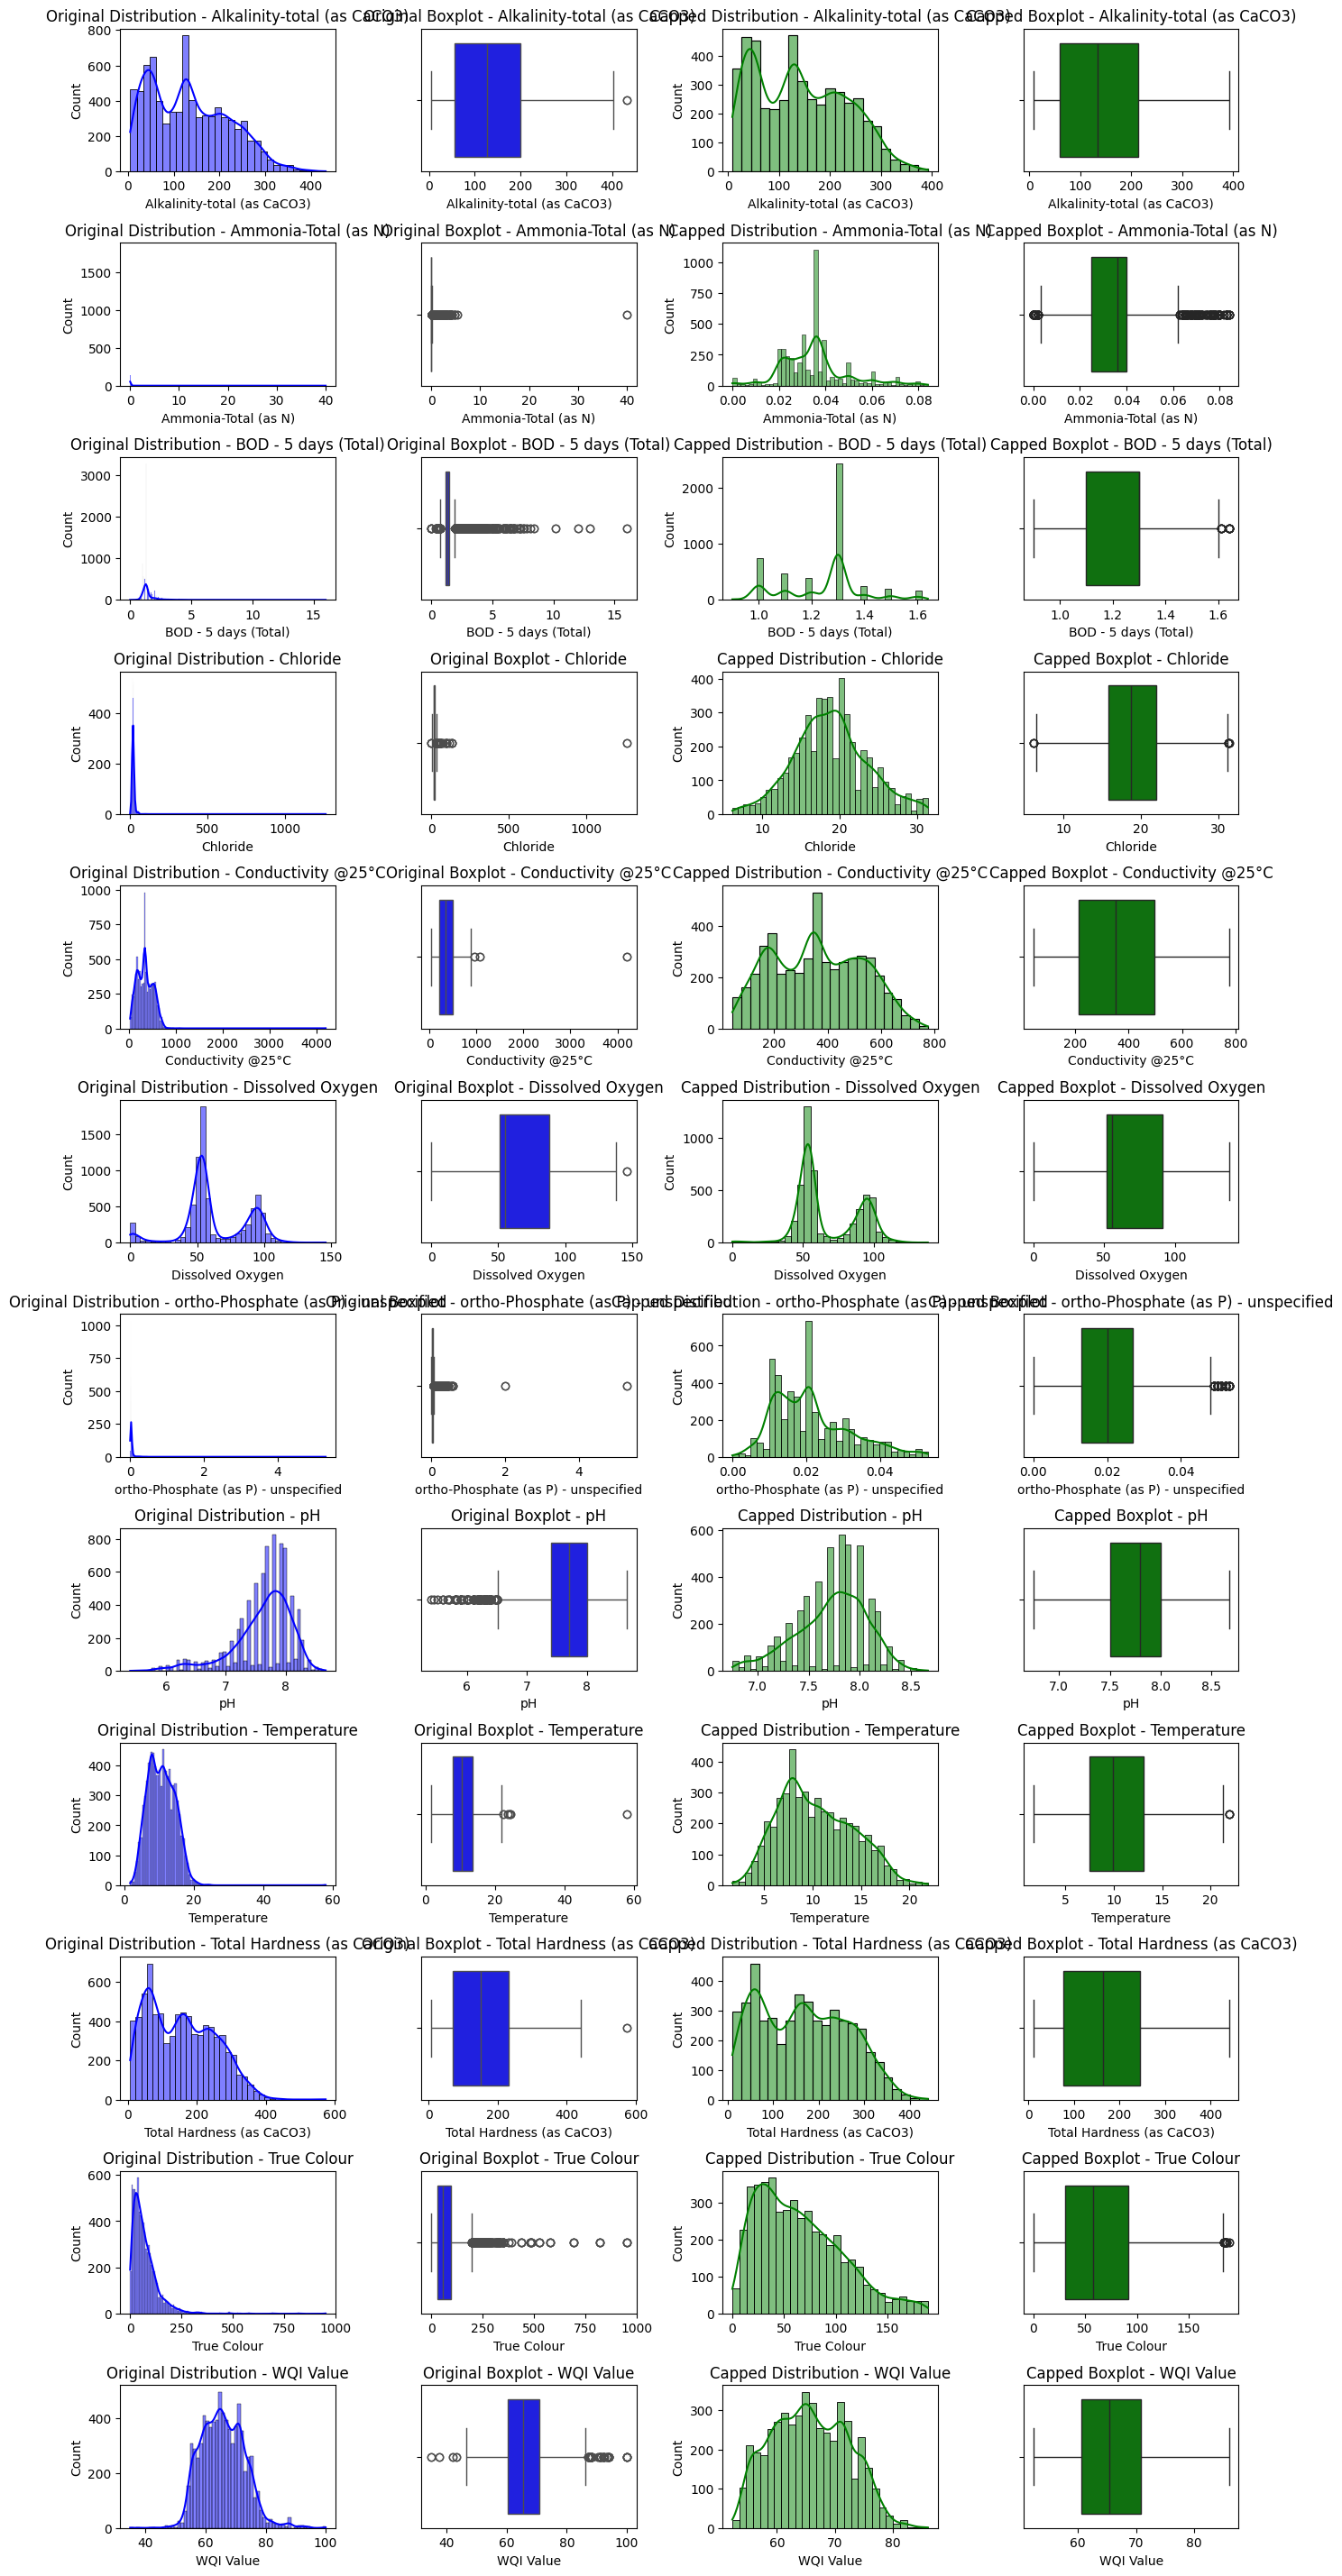

In [13]:
# Set up the figure size with more height for more subplots
plt.figure(figsize=(16, len(data.columns) * 3))

# Create subplots for each numerical column
for i, col in enumerate(data.columns, 1):  # Using data.columns directly, no need for 'numerical_columns'
    # First column: Distribution - original data
    plt.subplot(len(data.columns), 4, 4*i-3)
    sns.histplot(data[col].dropna(), kde=True, color='blue')
    plt.title(f'Original Distribution - {col}')

    # Second column: Boxplot - original data
    plt.subplot(len(data.columns), 4, 4*i-2)
    sns.boxplot(x=data[col].dropna(), color='blue')
    plt.title(f'Original Boxplot - {col}')

    # Third column: Distribution - capped data (Assumed to be in 'df')
    plt.subplot(len(data.columns), 4, 4*i-1)
    sns.histplot(df[col].dropna(), kde=True, color='green')
    plt.title(f'Capped Distribution - {col}')

    # Fourth column: Boxplot - capped data (Assumed to be in 'df')
    plt.subplot(len(data.columns), 4, 4*i)
    sns.boxplot(x=df[col].dropna(), color='green')
    plt.title(f'Capped Boxplot - {col}')

# Adjust layout manually to prevent overlap
plt.subplots_adjust(hspace=0.5, wspace=0.4)

# Show the plots
plt.show()

In [14]:
# Data normalization (except for 'WQI')
for column in df.columns:
    if column != 'WQI Value':
        # Min-Max scaling
        df[column] = (df[column] - df[column].min()) / (df[column].max() - df[column].min())

WQI Value                               1.000000
Dissolved Oxygen                        0.687046
Alkalinity-total (as CaCO3)             0.574312
Total Hardness (as CaCO3)               0.567615
Conductivity @25°C                      0.536257
True Colour                             0.533809
ortho-Phosphate (as P) - unspecified    0.424885
pH                                      0.301078
Chloride                                0.242981
Ammonia-Total (as N)                    0.199285
BOD - 5 days (Total)                    0.063454
Temperature                             0.033240
Name: WQI Value, dtype: float64


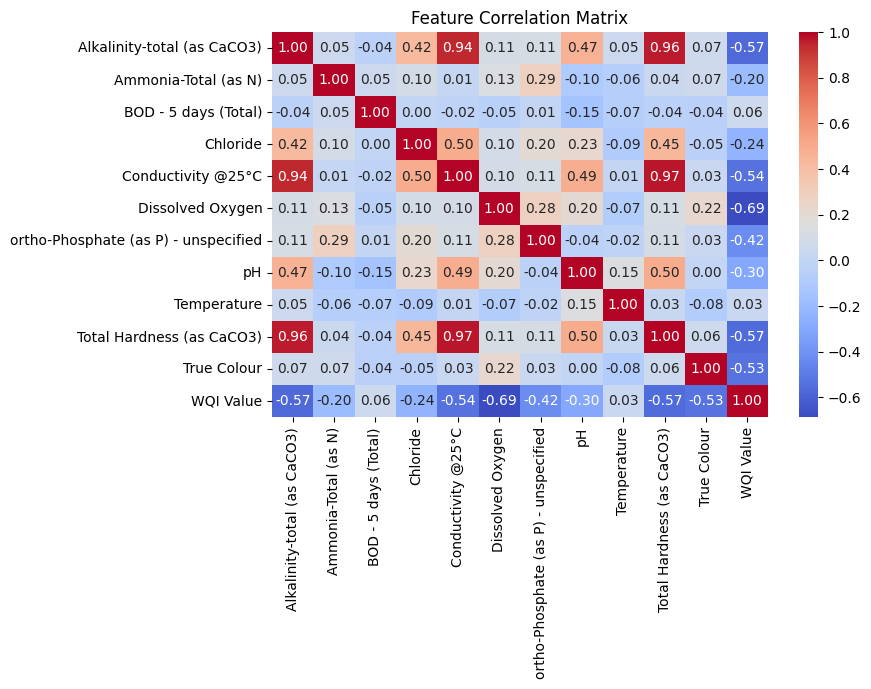

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix
corr_matrix = df.corr()

# Get correlation of WQI with other features
wqi_corr = corr_matrix["WQI Value"].abs().sort_values(ascending=False)
print(wqi_corr)

# Visualize correlation as a heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Matrix")
plt.show()

In [22]:
corr_threshold = 0.5  # Define threshold
selected_features = wqi_corr[wqi_corr > corr_threshold].index.tolist()
selected_features.remove("WQI Value")  # Exclude WQI itself

print("Selected Features for Prediction:", selected_features)

Selected Features for Prediction: ['Dissolved Oxygen', 'Alkalinity-total (as CaCO3)', 'Total Hardness (as CaCO3)', 'Conductivity @25°C', 'True Colour']


In [23]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Define X (features) and y (target)
X = data[selected_features]
y = data["WQI Value"]

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R² Score: {r2}")
# Calculate Normalized Percentage Error (NPE)
npe = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print(f"Normalized Percentage Error (NPE): {npe:.2f}%")

Mean Squared Error (MSE): 2.5554170917240713
R² Score: 0.9512127527645999
Normalized Percentage Error (NPE): 1.38%


In [24]:
# prompt: use xgboost, ada boost and gradient boosting

!pip install xgboost
import xgboost as xgb
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor

# Initialize and train an XGBoost Regressor
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42) # Use 'reg:squarederror' for regression
xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("XGBoost")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")
npe = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print(f"Normalized Percentage Error (NPE): {npe:.2f}%")


# Initialize and train an AdaBoost Regressor
ada_model = AdaBoostRegressor(n_estimators=100, random_state=42)
ada_model.fit(X_train, y_train)
y_pred = ada_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("\nAdaBoost")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")
npe = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print(f"Normalized Percentage Error (NPE): {npe:.2f}%")


# Initialize and train a GradientBoostingRegressor
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)
y_pred = gb_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("\nGradientBoosting")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")
npe = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print(f"Normalized Percentage Error (NPE): {npe:.2f}%")

XGBoost
Mean Squared Error (MSE): 3.1396124979356372
R-squared (R2): 0.9400594714435457
Normalized Percentage Error (NPE): 1.70%

AdaBoost
Mean Squared Error (MSE): 20.89648086248452
R-squared (R2): 0.6010507319961527
Normalized Percentage Error (NPE): 5.55%

GradientBoosting
Mean Squared Error (MSE): 8.354563110683122
R-squared (R2): 0.8404972177165582
Normalized Percentage Error (NPE): 3.10%
